In [51]:
import json
from texttable import Texttable
import latextable
from tabulate import tabulate
import sys
file_directory = "../"
sys.path.append(file_directory)
from generateDataset import generateDatasetFromResults
from metric import internalResultConsistency, calculatePercentageReductionSeries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from matplotlib import rcParams, ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import statistics
from plotsVariation import generate_stats
import copy

# Building datasets

## Variation percentage shape index entries

In [2]:
shapeIndexPathResult = "../results/standard/shape_index_result.json"
shapeIndexPathSummary = "../results/standard/summary_shape_index_result.json"
shapeIndexDataset = generateDatasetFromResults(shapeIndexPathResult, shapeIndexPathSummary, "shape index entries 100%")

In [3]:
shapeIndex20PathResult = "../results/shape-entry-20-percent/shape_index_result.json"
shapeIndex20PathSummary = "../results/shape-entry-20-percent/summary_shape_index_result.json"
shapeIndex20EntryDataset = generateDatasetFromResults(shapeIndex20PathResult, shapeIndex20PathSummary, "shape index entries 20%")

In [4]:
shapeIndex50PathResult = "../results/shape-entry-50-percent/shape_index_result.json"
shapeIndex50PathSummary = "../results/shape-entry-50-percent/summary_shape_index_result.json"
shapeIndex50EntryDataset = generateDatasetFromResults(shapeIndex50PathResult, shapeIndex50PathSummary, "shape index entries 50%")

In [5]:
shapeIndex80PathResult = "../results/shape-entry-80-percent/shape_index_result.json"
shapeIndex80PathSummary = "../results/shape-entry-80-percent/summary_shape_index_result.json"
shapeIndex80EntryDataset = generateDatasetFromResults(shapeIndex80PathResult, shapeIndex80PathSummary, "shape index entries 80%")

## Variation percentage shape index

In [6]:
shapeIndex0PathResult = "../results/shape-index-0-percent/shape_index_result.json"
shapeIndex0PathSummary = "../results/shape-index-0-percent/summary_shape_index_result.json"
shapeIndex0Dataset = generateDatasetFromResults(shapeIndex0PathResult, shapeIndex0PathSummary, "shape index network 0%")

In [7]:
shapeIndex20PathResult = "../results/shape-index-20-percent/shape_index_result.json"
shapeIndex20PathSummary = "../results/shape-index-20-percent/summary_shape_index_result.json"
shapeIndex20Dataset = generateDatasetFromResults(shapeIndex20PathResult, shapeIndex20PathSummary, "shape index network 20%")

In [8]:
shapeIndex50PathResult = "../results/shape-index-50-percent/shape_index_result.json"
shapeIndex50PathSummary = "../results/shape-index-50-percent/summary_shape_index_result.json"
shapeIndex50Dataset = generateDatasetFromResults(shapeIndex50PathResult, shapeIndex50PathSummary, "shape index network 50%")

In [9]:
shapeIndex80PathResult = "../results/shape-index-80-percent/shape_index_result.json"
shapeIndex80PathSummary = "../results/shape-index-80-percent/summary_shape_index_result.json"
shapeIndex80Dataset = generateDatasetFromResults(shapeIndex80PathResult, shapeIndex80PathSummary, "shape index network 80%")

## Variation detail of shapes

In [10]:
shapeIndexInnerPathResult = "../results/shape-inner/shape_index_result.json"
shapeIndexInnerPathSummary = "../results/shape-inner/summary_shape_index_result.json"
shapeIndexInnerDataset = generateDatasetFromResults(shapeIndexInnerPathResult, shapeIndexInnerPathSummary, "Dataset shape model")

In [11]:
shapeIndexMinimalPathResult = "../results/shape-minimal/shape_index_result.json"
shapeIndexMinimalPathSummary = "../results/shape-minimal/summary_shape_index_result.json"
shapeIndexMinimalDataset = generateDatasetFromResults(shapeIndexMinimalPathResult, shapeIndexMinimalPathSummary, "Minimal model")

# Build statistic

In [12]:
instances_percentage_entry = [ shapeIndex20EntryDataset, shapeIndex50EntryDataset, shapeIndex80EntryDataset]
(
    result_object_means_http_entry,
    result_object_http_entry,
    result_object_means_time_entry,
    result_object_time_entry
) = generate_stats(instances_percentage_entry, shapeIndexDataset)

In [13]:
instances_percentage_shape_index = [ shapeIndex20Dataset, shapeIndex50Dataset, shapeIndex80Dataset]
(
    result_object_means_http_shape_index,
    result_object_http_shape_index,
    result_object_means_time_shape_index,
    result_object_time_shape_index
) = generate_stats(instances_percentage_shape_index, shapeIndexDataset)

In [14]:
instances_shape_detail = [shapeIndexInnerDataset, shapeIndexMinimalDataset]
(
    result_object_means_http_shape,
    result_object_http_shape,
    result_object_means_time_shape,
    result_object_time_shape
) = generate_stats(instances_shape_detail, shapeIndexDataset)

# Generate plot

In [15]:
query_to_skip = ["D8", "S2", "S3", "S6"]

In [16]:
QUERY_MAP = {
        "interactive-discover-1": "D1",
        "interactive-discover-2": "D2",
        "interactive-discover-3": "D3",
        "interactive-discover-4": "D4",
        "interactive-discover-5": "D5",
        "interactive-discover-6": "D6",
        "interactive-discover-7": "D7",
        "interactive-discover-8": "D8",
        "interactive-short-1": "S1",
        "interactive-short-2": "S2",
        "interactive-short-3": "S3",
        "interactive-short-4": "S4",
        "interactive-short-5": "S5",
        "interactive-short-6": "S6",
        "interactive-short-7": "S7"
    }

QUERIES = list(QUERY_MAP.values())

In [17]:
indexes_to_skip = []
queries = copy.deepcopy(QUERIES)
for query in query_to_skip:
    index = queries.index(query)
    indexes_to_skip.append(index)

for query in query_to_skip:
    index = queries.index(query)
    del queries[index]

In [18]:
color_map_entry = {
    "shape index entries 100%": '#1A85FF',
    "shape index entries 0%": '#D41159',
    "shape index entries 20%": '#004D40',
    "shape index entries 50%": '#FFC107',
    "shape index entries 80%": '#994F00'
}

color_map_shape_index = {
    "shape index network 100%": '#1A85FF',
    "shape index network 0%": '#D41159',
    "shape index network 20%": '#004D40',
    "shape index network 50%": '#FFC107',
    "shape index network 80%": '#994F00'
}

color_map_shape = {
    "Full shape model": '#1A85FF',
    "Dataset shape model": '#D41159',
    "Minimal model": '#004D40',
}

In [19]:
variations = [
    result_object_time_shape_index,
    result_object_time_entry,
    result_object_time_shape
]
color_maps = [
    color_map_shape_index,
    color_map_entry,
    color_map_shape
]

In [53]:
fontSize = 25
ylim = 11
yaxisLabel = 'ratio execution time'

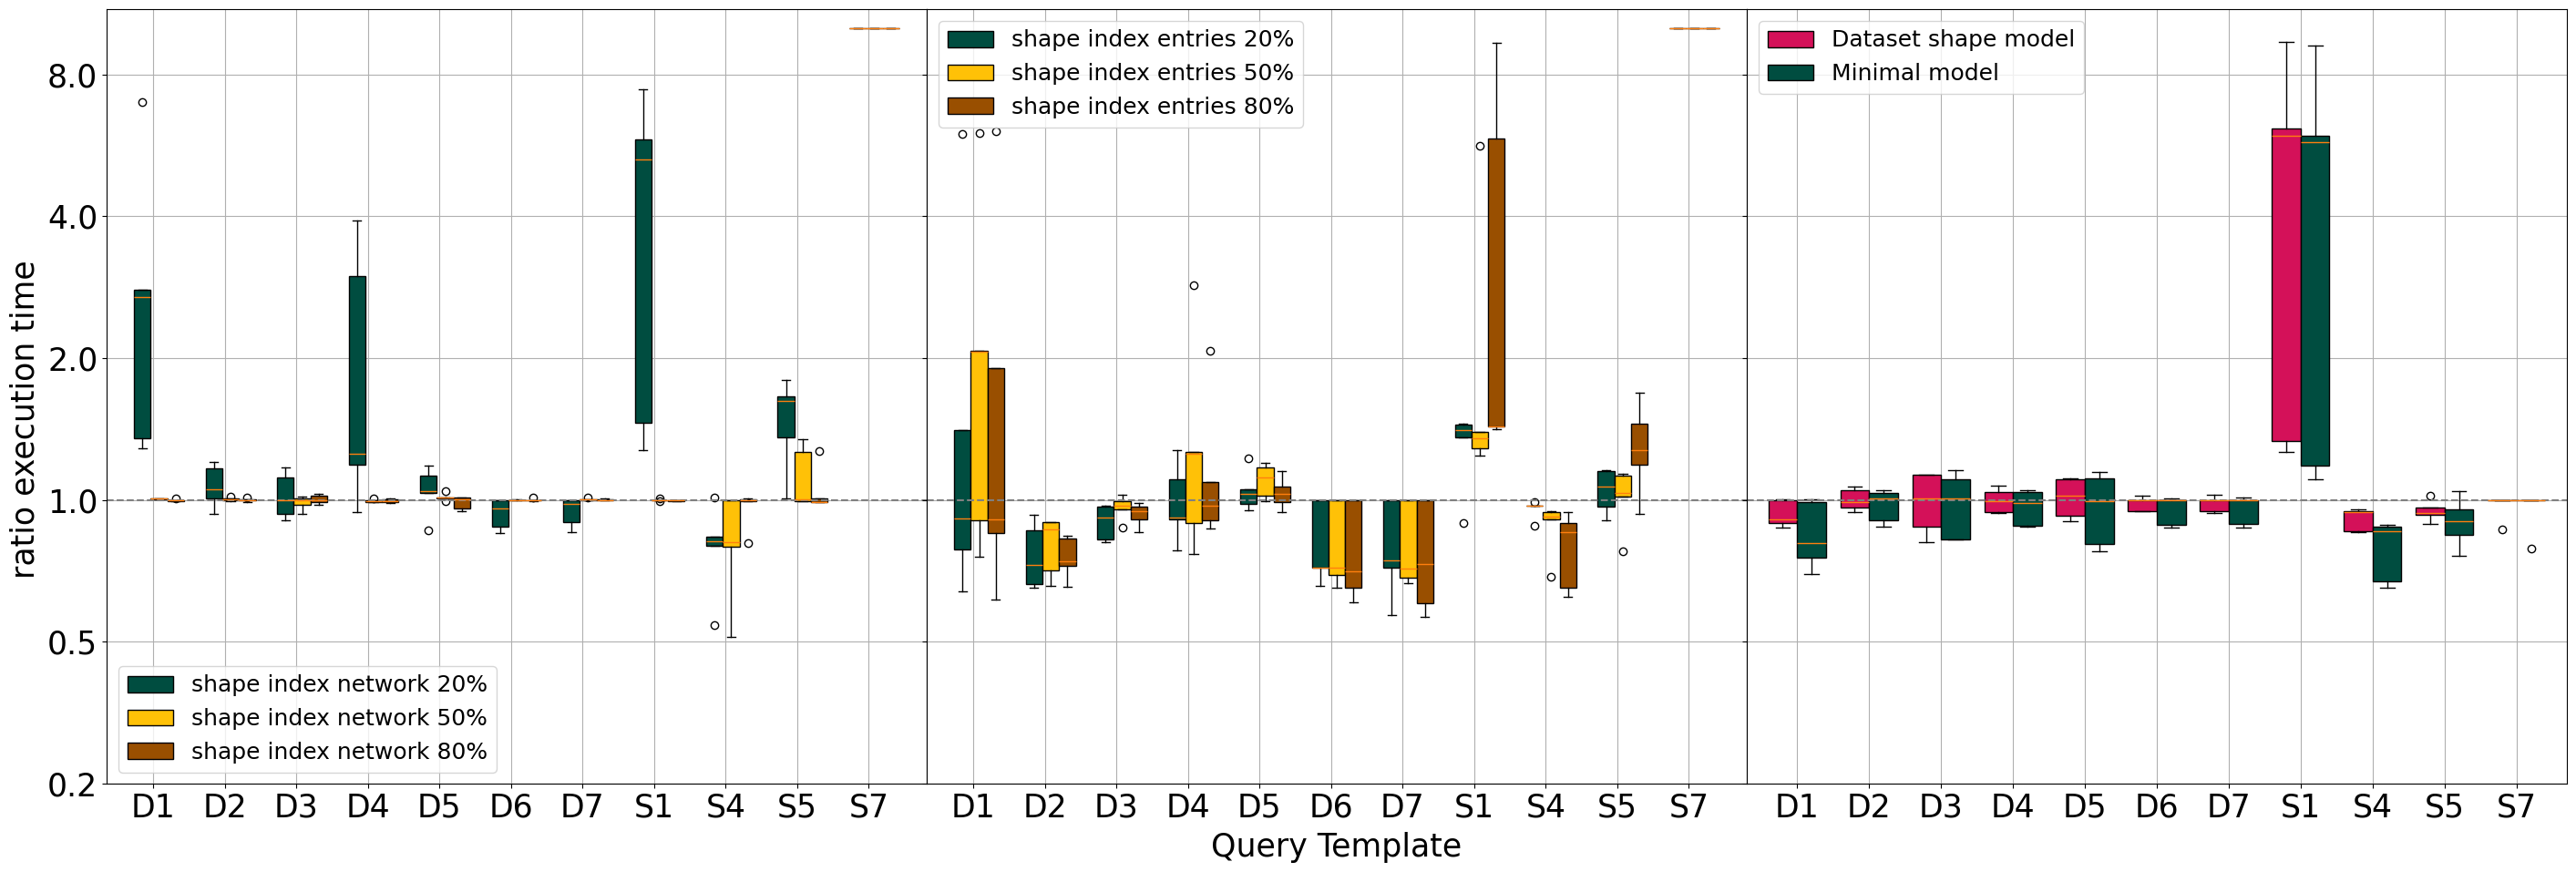

In [60]:
rcParams.update({'font.size': fontSize})

x = np.arange(len(queries))


fig, axs = plt.subplots(1,3, sharey=True, figsize=(30, 10))

for i, results in enumerate(variations):
    len_instance = len(results)
    color_map = color_maps[i]
    width = 1/len_instance - 0.1
    ax = axs[i]
    multiplier = 0
    for dataset, measurements in results.items():
        offset = width * multiplier + width/len(results)
        data = list(range(len(queries)))
        rewind = 0
        for i, measurement in enumerate(measurements):
            all_nan = all(np.isnan(el) for el in measurement)
            if all_nan:
                rewind+=1
                continue
            data[i-rewind] = [1 if np.isnan(x) else x for x in measurement]
        multiplier += 1
        ax.boxplot(data,
                   positions=x+offset,
                   widths=width,
                   patch_artist=True,
                   label=dataset,
                   boxprops=dict(facecolor=color_map[dataset]),
                  )
        
    ax.set_ylim(0.25, ylim)
    #ax.set_xlabel("query template")
    ax.set_yscale('log', base=2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: '{:.1f}'.format(val)))
    ax.axhline(1, color='gray', linestyle='--')

    ax.set_xticks(x + width, queries)
    ax.grid(axis="both")
    ax.legend(fontsize="18")

fig.text(0.5, 0.03, "Query Template", ha='center', va='center', fontsize=fontSize)
fig.text(0.02, 0.5, yaxisLabel, ha='center', va='center', rotation='vertical', fontsize=fontSize)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)